In [42]:
import os
import pandas as pd
import regex as re
import textwrap
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
cwd = os.getcwd()
print(cwd)

/content


We aim to test the hypothesis that countries with lower health expenditure tend to have shorter life expectancy.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Databrushup.csv', encoding='ISO-8859-1')
df.head()

,Series Name,Series Code,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Afghanistan,AFG,101.454,97.415,94.018,90.342,88.431,86.803,84.296,82.565,79.735,..
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Albania,ALB,20.942,20.276,18.171,16.585,15.58,15.013,14.672,14.517,14.46,..
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Algeria,DZA,12.771,11.888,12.731,12.872,12.654,12.303,12.057,11.714,11.564,..
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,American Samoa,ASM,44.618,43.031,39.35,35.06,32.192,30.65,30.191,30.036,29.989,..
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Andorra,AND,6.925,7.402,7.176,6.404,6.08,5.985,6.091,5.887,5.91,..


In [4]:
df['Series Name'].value_counts()

,count
Series Name,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",217
"Contraceptive prevalence, any modern method (% of all women ages 15-49)",217
Demand for family planning satisfied by modern methods (% of married women with demand for family planning),217
Domestic general government health expenditure (% of current health expenditure),217
Domestic general government health expenditure per capita (current US$),217
"Hospital beds (per 1,000 people)",217
Lifetime risk of maternal death (%),217
"Life expectancy at birth, female (years)",217
"Life expectancy at birth, male (years)",217


In [5]:
df.isnull().sum()

,0
Series Name,3
Series Code,5
Country Name,5
Country Code,5
2014 [YR2014],5
2015 [YR2015],5
2016 [YR2016],5
2017 [YR2017],5
2018 [YR2018],5
2019 [YR2019],5


In [6]:
df.rename(columns={'Series Name':'series','Country Name':'country','Country Code':'isocode'},inplace=True)
df.head(1)

,series,Series Code,country,isocode,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Afghanistan,AFG,101.454,97.415,94.018,90.342,88.431,86.803,84.296,82.565,79.735,..


In [7]:
df.columns

Index(['series', 'Series Code', 'country', 'isocode', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]',
       '2023 [YR2023]'],
      dtype='object')

In [8]:
df.rename(columns={'2014 [YR2014]':'2014','2015 [YR2015]':'2015', '2016 [YR2016]':'2016', '2017 [YR2017]':'2017', '2018 [YR2018]':'2018',
       '2019 [YR2019]':'2019', '2020 [YR2020]':'2020', '2021 [YR2021]':'2021', '2022 [YR2022]':'2022',
       '2023 [YR2023]':'2023'}, inplace=True)

In [9]:
df.rename(columns={'Series Name':'series','Country Name':'country','Country Code':'isocode'})

,series,Series Code,country,isocode,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Afghanistan,AFG,101.454,97.415,94.018,90.342,88.431,86.803,84.296,82.565,79.735,..
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Albania,ALB,20.942,20.276,18.171,16.585,15.58,15.013,14.672,14.517,14.46,..
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Algeria,DZA,12.771,11.888,12.731,12.872,12.654,12.303,12.057,11.714,11.564,..
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,American Samoa,ASM,44.618,43.031,39.35,35.06,32.192,30.65,30.191,30.036,29.989,..
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Andorra,AND,6.925,7.402,7.176,6.404,6.08,5.985,6.091,5.887,5.91,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2824,Data from database: Health Nutrition and Popul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna()

,series,Series Code,country,isocode,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Afghanistan,AFG,101.454,97.415,94.018,90.342,88.431,86.803,84.296,82.565,79.735,..
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Albania,ALB,20.942,20.276,18.171,16.585,15.58,15.013,14.672,14.517,14.46,..
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Algeria,DZA,12.771,11.888,12.731,12.872,12.654,12.303,12.057,11.714,11.564,..
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,American Samoa,ASM,44.618,43.031,39.35,35.06,32.192,30.65,30.191,30.036,29.989,..
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Andorra,AND,6.925,7.402,7.176,6.404,6.08,5.985,6.091,5.887,5.91,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,Virgin Islands (U.S.),VIR,..,..,..,..,..,..,..,..,..,..
2817,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,West Bank and Gaza,PSE,..,..,..,..,..,..,..,..,..,..
2818,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,"Yemen, Rep.",YEM,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,..
2819,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,Zambia,ZMB,13.2,13,12.9,12.7,12.5,12.2,11.8,11.3,10.8,..


In [11]:
year_cols = ['2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

df_melted = pd.melt(df, id_vars=['country', 'isocode','series'], value_vars= year_cols, var_name='year', value_name='any_name')

df_melted.sample(5)

,country,isocode,series,year,any_name
11325,Bermuda,BMU,"Adolescent fertility rate (births per 1,000 wo...",2018,7.279
822,Singapore,SGP,Domestic general government health expenditure...,2014,45.03730774
3380,Malaysia,MYS,Demand for family planning satisfied by modern...,2015,..
11542,Bermuda,BMU,"Contraceptive prevalence, any modern method (%...",2018,..
22180,Austria,AUT,"Prevalence of HIV, male (% ages 15-24)",2021,..


In [12]:
df_melted.dropna()
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28260 entries, 0 to 28259
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   28210 non-null  object
 1   isocode   28210 non-null  object
 2   series    28230 non-null  object
 3   year      28260 non-null  object
 4   any_name  28210 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [13]:
df_melted.duplicated().sum()

20

In [14]:
df_melted = df_melted.loc[~df_melted.duplicated()].reset_index(drop=True)

In [15]:
# pivot the data frame
pivoted_df = df_melted.pivot(index=['country', 'isocode', 'year'], columns='series', values='any_name').reset_index()
print(pivoted_df.shape)
pivoted_df.sample(4)

(2180, 19)


series,country,isocode,year,NaN,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Contraceptive prevalence, any modern method (% of all women ages 15-49)",Data from database: Health Nutrition and Population Statistics,Demand for family planning satisfied by modern methods (% of married women with demand for family planning),Domestic general government health expenditure (% of current health expenditure),Domestic general government health expenditure per capita (current US$),"Hospital beds (per 1,000 people)",Last Updated: 07/01/2024,"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Prevalence of HIV, female (% ages 15-24)","Prevalence of HIV, male (% ages 15-24)","Prevalence of HIV, total (% of population ages 15-49)"
602,El Salvador,SLV,2016,NaN,65.213,..,NaN,..,55.62371826,187.60483853,1.06,NaN,77.075,66.762,72.025,0.0871313848151345,0.1,0.2,0.5
1274,Mauritius,MUS,2018,NaN,24.343,..,NaN,..,43.99140549,282.231918,..,NaN,77.72,71.27,74.4163414634146,0.069863714010644,..,..,..
847,Guyana,GUY,2021,NaN,66.556,..,NaN,..,67.59288788,318.0710189,..,NaN,69.104,62.481,65.673,..,0.3,0.2,1.5
374,Cayman Islands,CYM,2018,NaN,11.153,..,NaN,..,..,..,..,NaN,..,..,..,..,..,..,..


In [16]:
pivoted_df.rename(columns={'Life expectancy at birth, female (years)':'life_exp_f',
                           'Life expectancy at birth, male (years)':'life_exp_m',
                           'Domestic general government health expenditure per capita (current US$)':'health_spending_pc'},
                  inplace=True)

In [57]:
clean_df = pivoted_df[['country','isocode', 'life_exp_f', 'life_exp_m', 'health_spending_pc']].reset_index()
clean_df.head()

series,index,country,isocode,life_exp_f,life_exp_m,health_spending_pc
0,0,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN


In [58]:
clean_df.isnull().sum()

,0
series,
index,0
country,10
isocode,10
life_exp_f,10
life_exp_m,10
health_spending_pc,10


In [59]:
#droping the first 10 rows, where all the values are NaN
clean_df = clean_df.dropna().reset_index()
clean_df.isnull().sum()

,0
series,
level_0,0
index,0
country,0
isocode,0
life_exp_f,0
life_exp_m,0
health_spending_pc,0


In [60]:
clean_df.head(20)

series,level_0,index,country,isocode,life_exp_f,life_exp_m,health_spending_pc
0,10,10,Afghanistan,AFG,64.274,60.812,2.98555852
1,11,11,Afghanistan,AFG,64.576,60.76,3.10637149
2,12,12,Afghanistan,AFG,65.096,61.193,3.12218743
3,13,13,Afghanistan,AFG,66.099,60.105,3.40957279
4,14,14,Afghanistan,AFG,66.458,59.923,2.77333833
5,15,15,Afghanistan,AFG,66.677,60.619,2.48787785
6,16,16,Afghanistan,AFG,65.432,59.866,6.1311352
7,17,17,Afghanistan,AFG,65.279,58.915,2.6857651
8,18,18,Afghanistan,AFG,66.213,59.766,..
9,19,19,Afghanistan,AFG,..,..,..


In [61]:
#aimed at seeing the distribution info of health_spending_pc but realised that the columns are non-numeric
clean_df.describe()

series,level_0,index
count,2170.000000,2170.000000
mean,1094.500000,1094.500000
std,626.569363,626.569363
min,10.000000,10.000000
25%,552.250000,552.250000
50%,1094.500000,1094.500000
75%,1636.750000,1636.750000
max,2179.000000,2179.000000


In [62]:
#replacing the '..' for null values
clean_df.replace('..', np.nan, inplace=True)
clean_df.isnull().sum()

,0
series,
level_0,0
index,0
country,0
isocode,0
life_exp_f,284
life_exp_m,284
health_spending_pc,672


In [63]:
clean_df.shape

(2170, 7)

In [64]:
#since the df is very large, we drop all the rows with null values, so it makes manipulation easier
#and also because data on health spending is essential to answering our question
clean_df=clean_df.dropna()

In [65]:
#turning the numerical columns into floats
clean_df['life_exp_f'] = pd.to_numeric(clean_df['life_exp_f'], errors='coerce')
clean_df['life_exp_m'] = pd.to_numeric(clean_df['life_exp_m'], errors='coerce')
clean_df['health_spending_pc'] = pd.to_numeric(clean_df['health_spending_pc'], errors='coerce')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 0 to 2167
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             1466 non-null   int64  
 1   index               1466 non-null   int64  
 2   country             1466 non-null   object 
 3   isocode             1466 non-null   object 
 4   life_exp_f          1466 non-null   float64
 5   life_exp_m          1466 non-null   float64
 6   health_spending_pc  1466 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 91.6+ KB


<ipython-input-65-96e788d93274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['life_exp_f'] = pd.to_numeric(clean_df['life_exp_f'], errors='coerce')
<ipython-input-65-96e788d93274>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['life_exp_m'] = pd.to_numeric(clean_df['life_exp_m'], errors='coerce')
<ipython-input-65-96e788d93274>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [66]:
clean_df.describe()

series,level_0,index,life_exp_f,life_exp_m,health_spending_pc
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,1086.864256,1086.864256,74.361933,69.138967,760.130620
std,622.684604,622.684604,7.915925,7.553393,1349.704205
min,10.000000,10.000000,52.196000,47.419000,1.604051
25%,545.250000,545.250000,68.340750,63.341250,34.446045
50%,1090.500000,1090.500000,76.330000,69.569500,188.960888
75%,1623.750000,1623.750000,80.530250,74.700000,703.825698
max,2177.000000,2177.000000,87.710000,82.100000,7871.000000


In [67]:
threshold = clean_df['health_spending_pc'].median()
print(threshold)

188.96088837


In [68]:
# it will give us the amount of countries in each of the categories
clean_df['expenditure_category'] = ['High' if x > threshold else 'Low' for x in clean_df['health_spending_pc']]
print(clean_df['expenditure_category'].value_counts())

expenditure_category
Low     733
High    733
Name: count, dtype: int64


<ipython-input-68-bf381cc7b884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['expenditure_category'] = ['High' if x > threshold else 'Low' for x in clean_df['health_spending_pc']]


With the clean data set, we can proceed to properly visualize the relationship between the chosen variables.

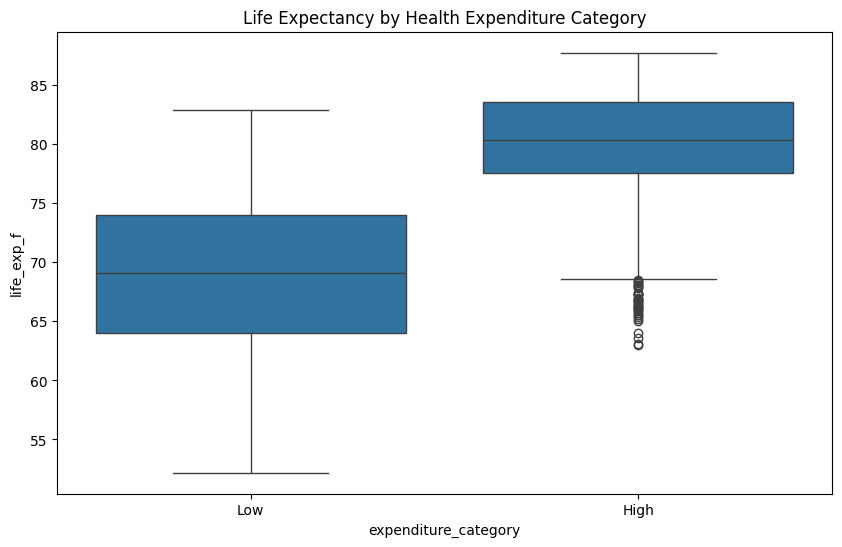

In [69]:
# Plot for health expenditure vs female life expectancy
plt.figure(figsize=(10, 6))
sns.boxplot(x='expenditure_category', y='life_exp_f', data=clean_df)
plt.title('Life Expectancy by Health Expenditure Category')
plt.show()

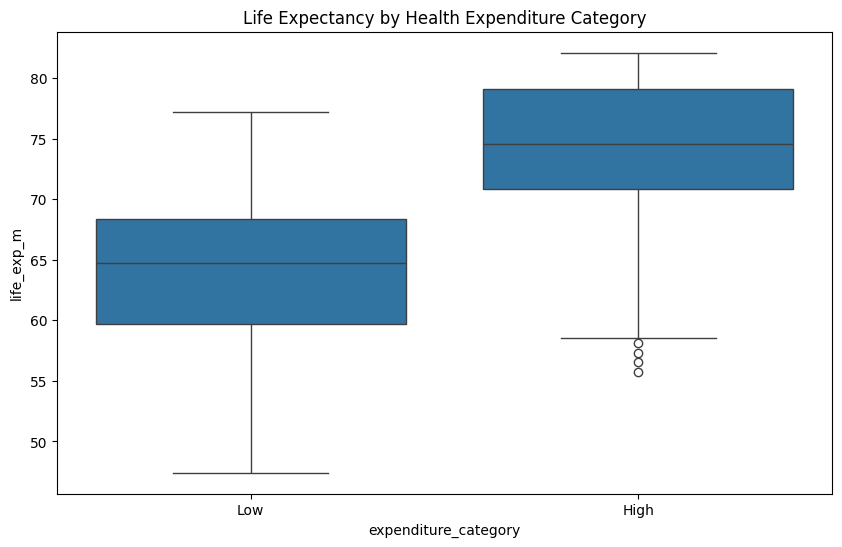

In [70]:
# Plot for health expenditure vs male life expectancy
plt.figure(figsize=(10, 6))
sns.boxplot(x='expenditure_category', y='life_exp_m', data=clean_df)
plt.title('Life Expectancy by Health Expenditure Category')
plt.show()

In [71]:
# Calculate correlation for low expenditure group
low_expenditure = clean_df[clean_df['expenditure_category'] == 'Low']
high_expenditure = clean_df[clean_df['expenditure_category'] == 'High']

correlation_low = low_expenditure['health_spending_pc'].corr(low_expenditure['life_exp_f'])
correlation_high = high_expenditure['health_spending_pc'].corr(high_expenditure['life_exp_f'])

print(f'Correlation coefficient (low expenditure): {correlation_low}')
print(f'Correlation coefficient (high expenditure): {correlation_high}')


Correlation coefficient (low expenditure): 0.6248632046151162
Correlation coefficient (high expenditure): 0.5678837385865088


These results show a positive correlation between health spending and life expectancy, although it is not strict. This means that as health spending increases, life expectancy tends to rise as well. Additionally, it is worth noting that the 'low group' life expectancy is more closely correlated with expenditure than 'high' life expectancy, although the difference is not very significant.

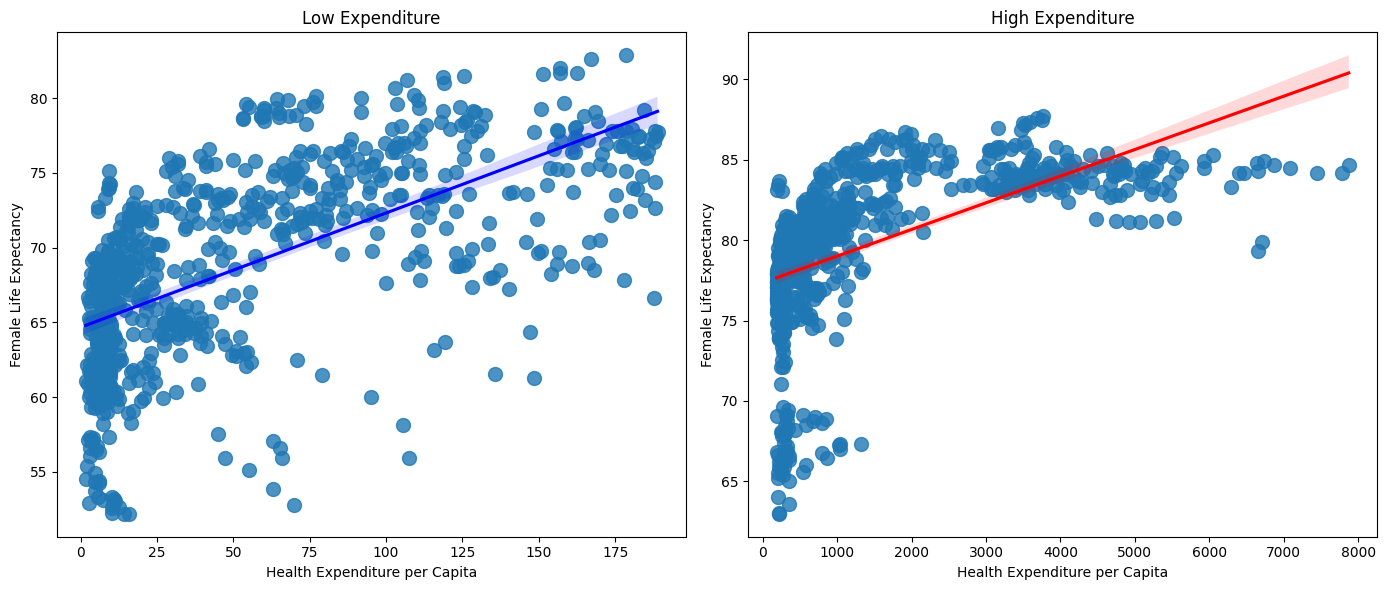

In [72]:
plt.figure(figsize=(14, 6))

# Plot for Low Expenditure
plt.subplot(1, 2, 1)
sns.regplot(x='health_spending_pc', y='life_exp_f', data=low_expenditure, scatter_kws={'s':100}, line_kws={'color':'blue'})
plt.title('Low Expenditure')
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Female Life Expectancy')

# Plot for High Expenditure
plt.subplot(1, 2, 2)
sns.regplot(x='health_spending_pc', y='life_exp_f', data=high_expenditure, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('High Expenditure')
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Female Life Expectancy')

plt.tight_layout()
plt.show()

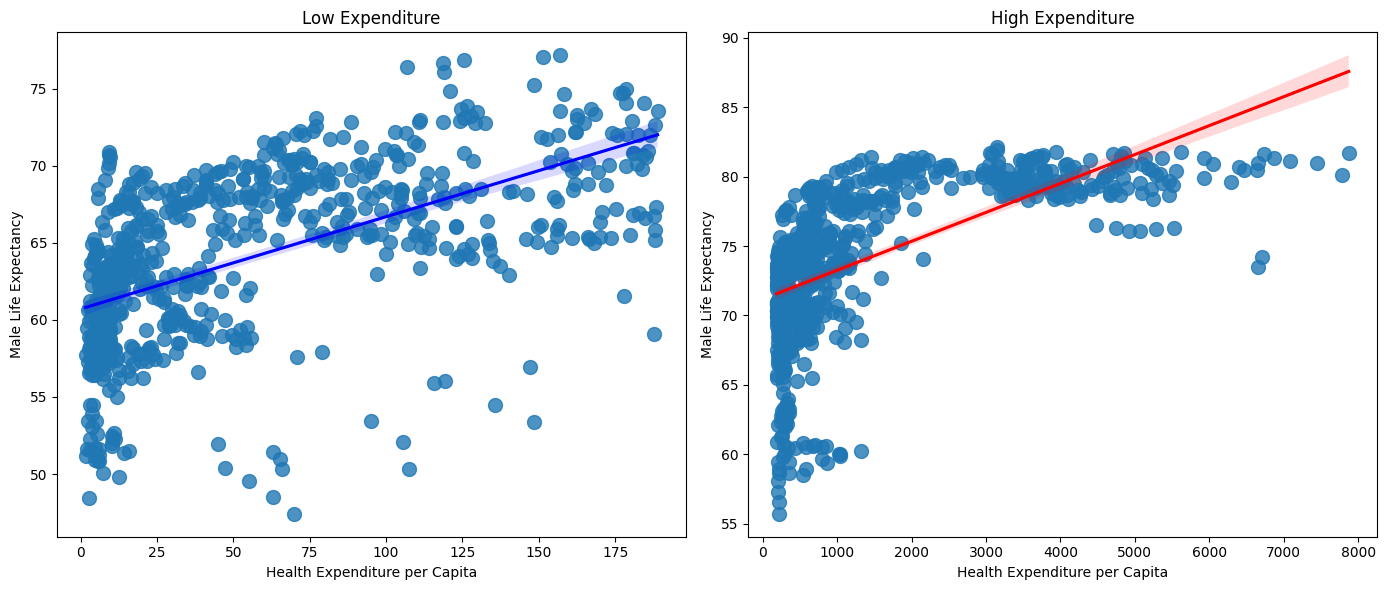

In [73]:
plt.figure(figsize=(14, 6))

# Plot for Low Expenditure
plt.subplot(1, 2, 1)
sns.regplot(x='health_spending_pc', y='life_exp_m', data=low_expenditure, scatter_kws={'s':100}, line_kws={'color':'blue'})
plt.title('Low Expenditure')
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Male Life Expectancy')

# Plot for High Expenditure
plt.subplot(1, 2, 2)
sns.regplot(x='health_spending_pc', y='life_exp_m', data=high_expenditure, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('High Expenditure')
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Male Life Expectancy')

plt.tight_layout()
plt.show()

The scatter plot represents a positive correlation between the studied variables, as previously mentioned.

In [74]:
from scipy import stats

# Separate the data into two groups
low_expenditure = clean_df[clean_df['expenditure_category'] == 'Low']['life_exp_f']
high_expenditure = clean_df[clean_df['expenditure_category'] == 'High']['life_exp_f']

# Perform a t-test to compare the means of life expectancy
t_stat, p_value = stats.ttest_ind(low_expenditure, high_expenditure)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -35.9007648808815
P-value: 5.458440503331154e-203


In [75]:
from scipy import stats

# Separate the data into two groups
low_expenditure = clean_df[clean_df['expenditure_category'] == 'Low']['life_exp_m']
high_expenditure = clean_df[clean_df['expenditure_category'] == 'High']['life_exp_m']

# Perform a t-test to compare the means of life expectancy
t_stat, p_value = stats.ttest_ind(low_expenditure, high_expenditure)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -34.82444350573358
P-value: 4.557995397019273e-194


The p-value is extremely low, indicating a highly significant correlation between health expenditure and life expectancy. The large t-statistic (-35.90) and (-34.83) confirms a strong relationship.

The analysis may be limited by small or uneven sample sizes, high within-group variability, and the assumption of a linear relationship. Arbitrary thresholds for expenditure categories and omitted variables could also bias the results. These factors should be considered when interpreting the findings.


